In [39]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [40]:

model = Sequential([
    Dense(5, input_shape = (3, ), activation='relu'),    # 5 hidden layers
    Dense(2, activation='softmax'),                      # 2 output layers
])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  


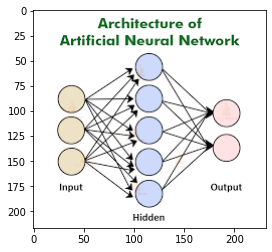

In [41]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
%matplotlib inline

img = np.expand_dims(ndimage.imread('/content/NN.png'), 0)
plt.imshow(img[0])

# Action Functions

In [42]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
                    Dense(5, input_shape=(3,), activation='relu')
])

Same as above

In [43]:
model = Sequential()
model.add(Dense(5, input_shape=(3,)))
model.add(Activation('relu'))

# Training

Solving an optimization problem

<ol><li>Optimizing weights
<ul>
         <li>   with Stochatic Gradient Descent(SGD) </li> </ul>
    <li>Objective: Minimize the loss function</li>
</ol>

In [44]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

In [45]:
train_labels = []
train_samples = []

Example data: 

<ul> 
<li>An experimental drug was tested on individuas from ages 13 to 65.</li>
<li>The trial had 2100 participants. Half were usder 65 years old, half were over 65 years old.</li>
<li>95% of patientes 65 or older experienced side effects.</li>
<li>95% of patients under 65 experienced no side effects.</li>

In [46]:
for i in range(1000):
  random_younger = randint(13, 64)
  train_samples.append(random_younger)
  train_labels.append(0)

  random_older = randint(65, 100)
  train_samples.append(random_older)
  train_labels.append(1)

for i in range(50):
  random_younger = randint(13, 64)
  train_samples.append(random_younger)
  train_labels.append(1)

  random_older = randint(65, 100)
  train_samples.append(random_older)
  train_labels.append(0)

In [ ]:
# print raw data
for i in train_samples:
  print(i)

In [47]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

In [60]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform((train_samples).reshape(-1, 1))

# Learning

In [67]:
import keras
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [68]:
# 1 input layer
# 2 hidden dense layers
# with 16 and 32 neurons respectively
# and output layer with 2 units
model = Sequential([
                    Dense(16, input_shape=(1,), activation='relu'),  
                    Dense(32, activation='relu'),
                    Dense(2, activation='softmax')
])

once we have our model, the next thing we need to do before we can train it is to compile our model

In [69]:
# first parameter is an optimizer, SGD was a common optimizer.
# here I'm using an optimizer called as Adam, and that is a variation of SGD.
# learning_rate. we can also use "lr".
model.compile(Adam(learning_rate=0.0001), loss='sparse_categorical_crossentrophy', metrics=['accuracy'])

 This the actual function that is going to train the model

<b>first parameter</b> -- training data. here scaled_train_samples is a numpy array that holds all of our data.

<b>train_labels</b> -- again a numpy array that holds all the labels of the above training_data.

<b>batch_size</b> -- how many pieces of data do we want tobe send to the model at once.

<b>epochs</b> -- whenever we run this we're going to see there going to be 20 individual passes of the data through our model.

<b>shuffle</b> -- this is just going to shuffle our data around in a different order with each epoch.

<b>verbose</b> -- determines how much output we want to see whenever we train out model.

In [70]:
model.loss = 'sparse_categorical_crossentropy'

In [71]:
model.loss

'sparse_categorical_crossentropy'

In [75]:
model.fit(scaled_train_samples, train_labels, batch_size=10, epochs=20, shuffle=True, verbose=2)

Epoch 1/20


ValueError: ignored